In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [18]:
X,Y=make_blobs(n_samples=1000,centers=3,n_features=2)

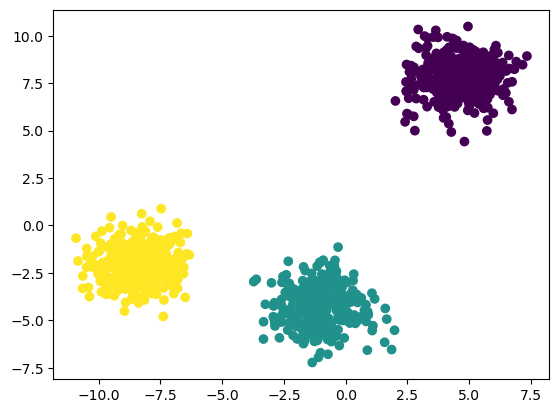

In [20]:
## Plot the data 
plt.scatter(X[:,0],X[:,1],c=Y)

In [21]:
## Standarization - Feature Scaling Techniques
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
X_train

array([[-0.95467837, -2.82833941],
       [ 5.16426013,  9.25973455],
       [ 4.97187753,  7.91799458],
       ...,
       [-7.52490338, -2.03459843],
       [-9.80803796, -2.88798444],
       [ 3.67002684,  9.07470386]])

In [25]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [35]:
## Elbow method to select K Value
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [36]:
wcss

[1400.0000000000011,
 284.86221371164044,
 48.11324796722631,
 43.07676997572052,
 37.35209275022294,
 32.35567227335279,
 27.05481046100783,
 24.19364218137234,
 22.692570775085045,
 19.925147086827312,
 17.63525915670164,
 16.403894017159804,
 15.67865169244426,
 14.613287028893994]

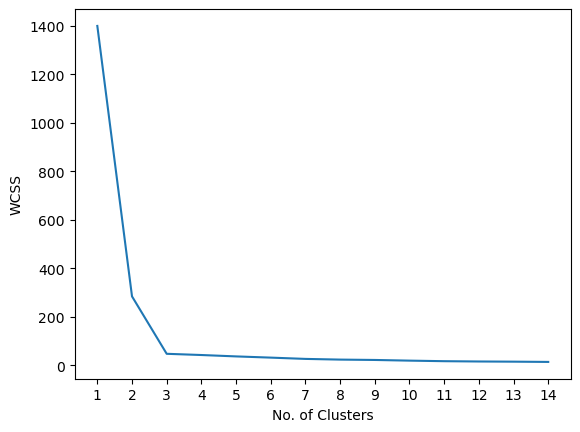

In [37]:
# Plot this elbow values
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

In [38]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [41]:
kmeans.fit_predict(X_train_scaled)


array([2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2,
       0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1,

In [42]:
Y_pred=kmeans.predict(X_test_scaled)
Y_pred

array([0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1,
       0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1])

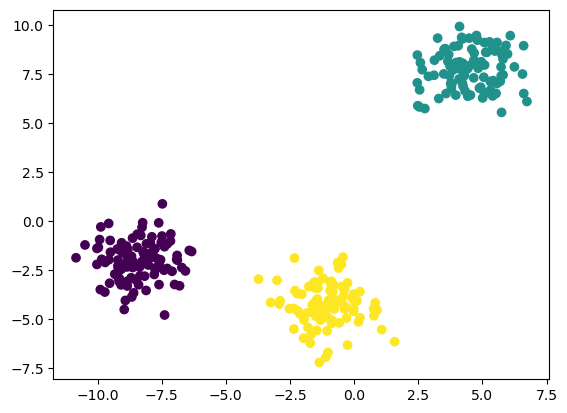

In [47]:

plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred)

### Different Techniques to select k value
* KneeLocator
* Silhoutte score

In [52]:
## KneeLocator

!pip install kneed


In [53]:
from kneed import KneeLocator
kl=KneeLocator(range(1,15),wcss,curve="convex",direction="decreasing")
kl.elbow

3

In [58]:
## Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.7415010769100882,
 0.8041625047340774,
 0.6494705726928364,
 0.5147313309722239,
 0.3224241878521108,
 0.33795312849327236,
 0.34976964609969613,
 0.34663036139435716,
 0.34695904397831245,
 0.36293017387906973,
 0.3356380789096972,
 0.33564230608865514,
 0.32499593346814665]

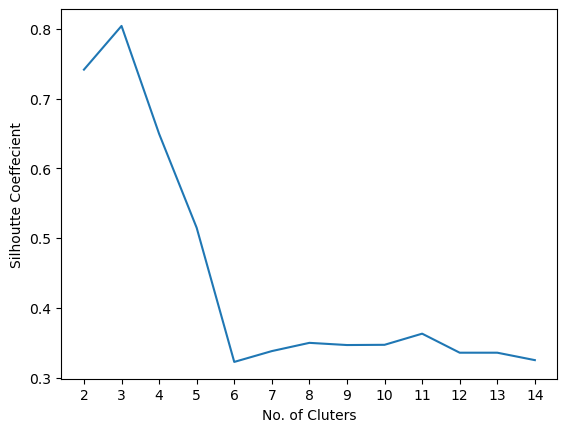

In [65]:
## Visualaize Silhouette score
plt.plot(range(2,15),silhouette_coefficients,)
plt.xticks(range(2,15))
plt.xlabel("No. of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

### The Highest peak wrt No. of Cluster = 3 therefore, k=3